In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math
from sklearn import metrics

In [2]:
data_excel = pd.read_csv("data/Base14.csv")
dataframe_data = pd.DataFrame(data_excel)
dataframe_train = pd.DataFrame(dataframe_data.drop(columns=['label']))
print(dataframe_data)
print(dataframe_train)

             x         y  label
0     3.381569 -3.421758      2
1     5.159139  6.815702      1
2     7.250949  8.434215      1
3     6.144624  3.325288      1
4    -2.600138 -0.044972      0
...        ...       ...    ...
1995  3.533525 -9.481305      2
1996  3.034379 -5.980947      2
1997 -4.094759  2.508122      0
1998  4.490083 -3.492859      2
1999  6.810115 -7.448688      2

[2000 rows x 3 columns]
             x         y
0     3.381569 -3.421758
1     5.159139  6.815702
2     7.250949  8.434215
3     6.144624  3.325288
4    -2.600138 -0.044972
...        ...       ...
1995  3.533525 -9.481305
1996  3.034379 -5.980947
1997 -4.094759  2.508122
1998  4.490083 -3.492859
1999  6.810115 -7.448688

[2000 rows x 2 columns]


<Figure size 800x500 with 0 Axes>

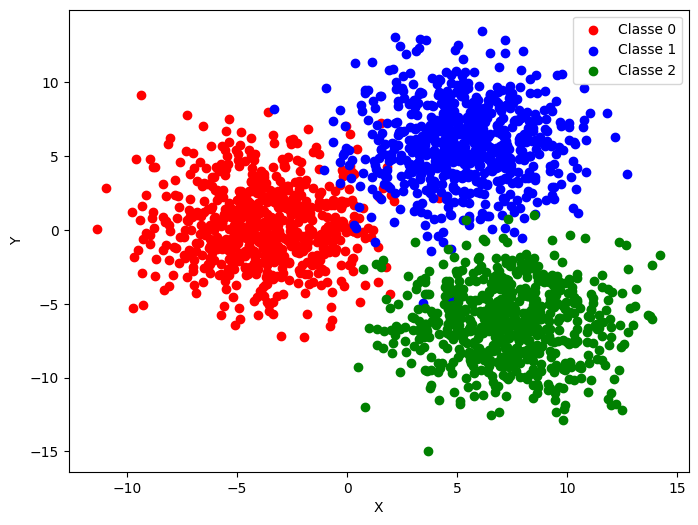

In [3]:
plt.figure(figsize=(8,5))
label_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create the scatter plot
plt.figure(figsize=(8, 6))
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=f'Classe {label}')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dataframe_train)
centro = kmeans.cluster_centers_
X = kmeans.labels_

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(dataframe_train,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dataframe_data['label'],kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dataframe_data['label'],kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(dataframe_data['label'],kmeans.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dataframe_data['label'], kmeans.labels_))


Soma dos quadrados das distâncias até o centróide mais próximo:  22587.20781679148

Coesão:  37.57260289824845

Coeficiente de Silhueta:  0.4731479486786803

Rand Score K-means:  0.9175457728864432

Homogeneidade :  0.8942258071438983

Completude :  0.7332178095912533

Matriz de contingência kmeans
 [[268   1   3 395]
 [ 40   7 620   0]
 [  1 658   3   4]]


c:\Users\joao_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


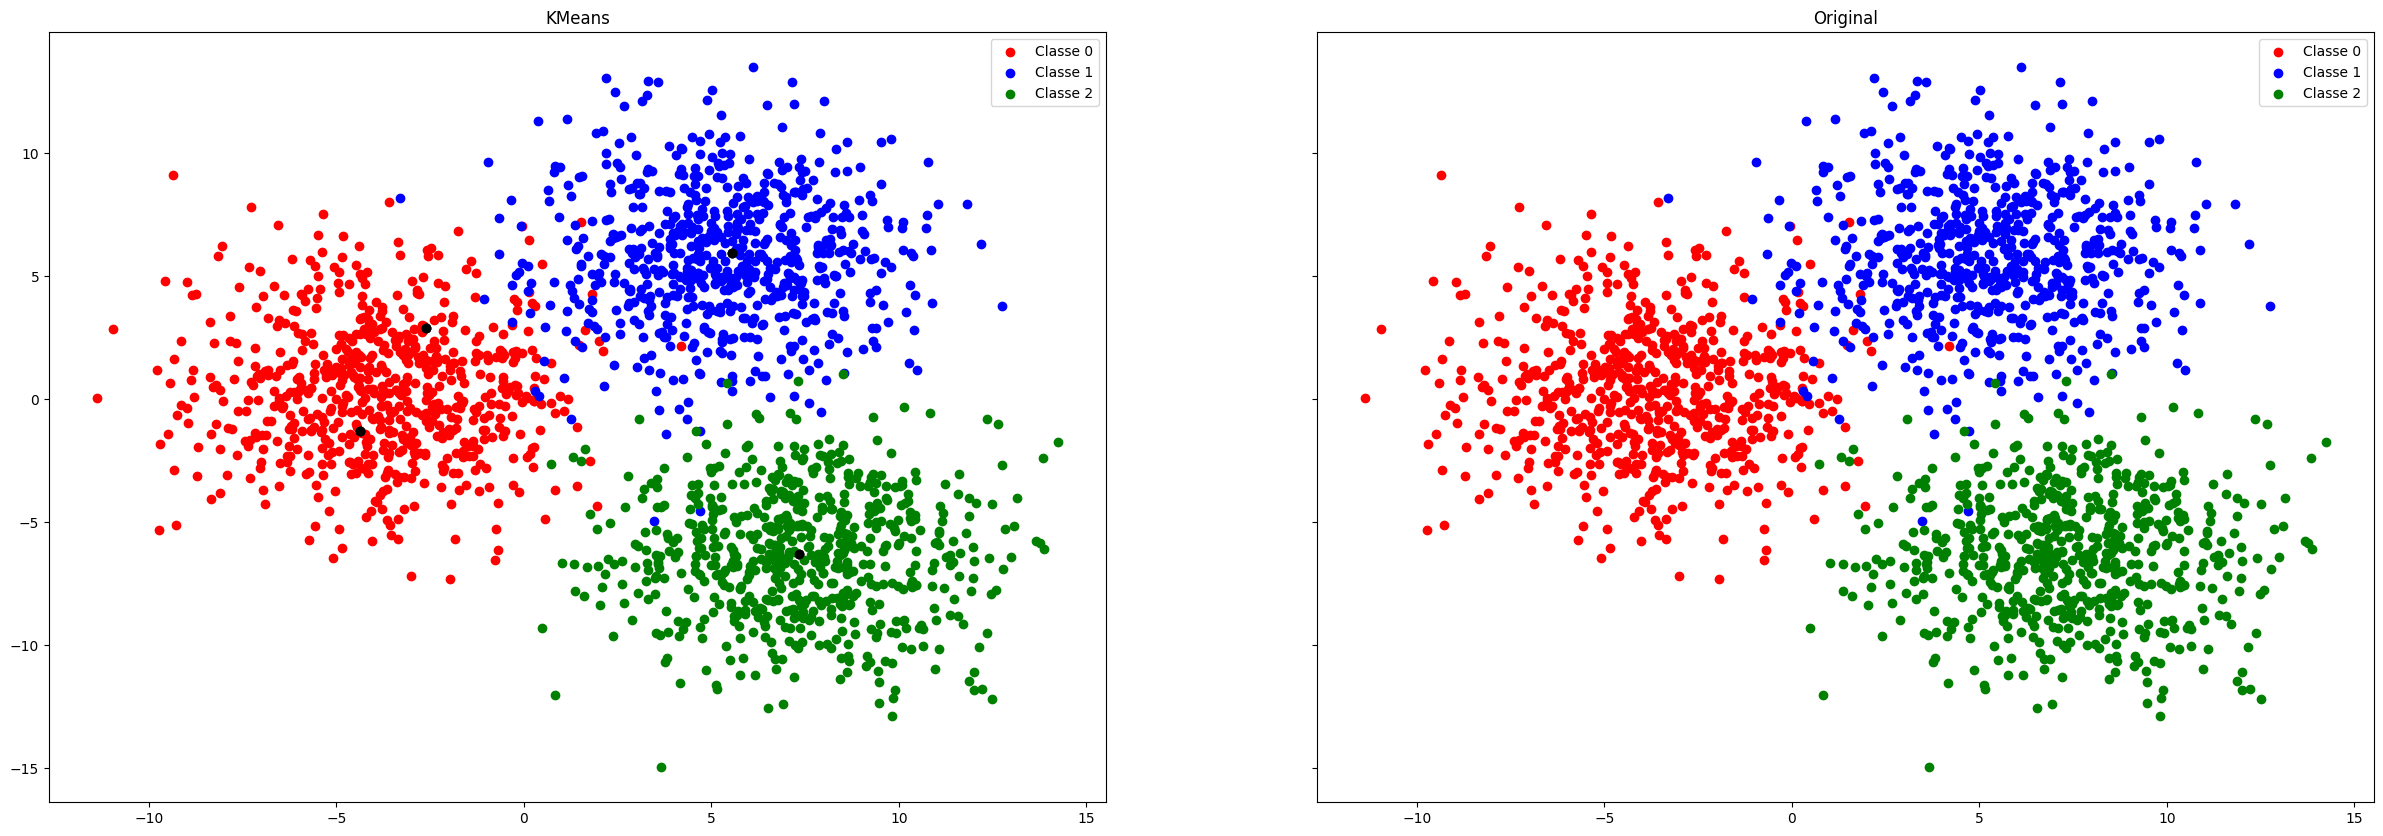

In [6]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(30,10))
ax1.set_title("KMeans")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax1.scatter(subset['x'], subset['y'], c=color, label=f'Classe {label}')
    ax1.scatter(centro[:,0],centro[:,1],color='black')
ax1.legend()
ax2.set_title("Original")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax2.scatter(subset['x'], subset['y'], c=color, label=f'Classe {label}')

# Add labels and legend
ax2.legend()


In [16]:
db = DBSCAN(eps=0.7, min_samples=10)
db.fit(dataframe_data)
X = db.labels_

print("\nCoesão: ",math.sqrt(db.inertia_)/db.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(dataframe_train,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dataframe_data['label'],db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dataframe_data['label'],db.labels_))

print("\nCompletude : ",metrics.completeness_score(dataframe_data['label'],db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dataframe_data['label'], db.labels_))

AttributeError: 'DBSCAN' object has no attribute 'inertia_'

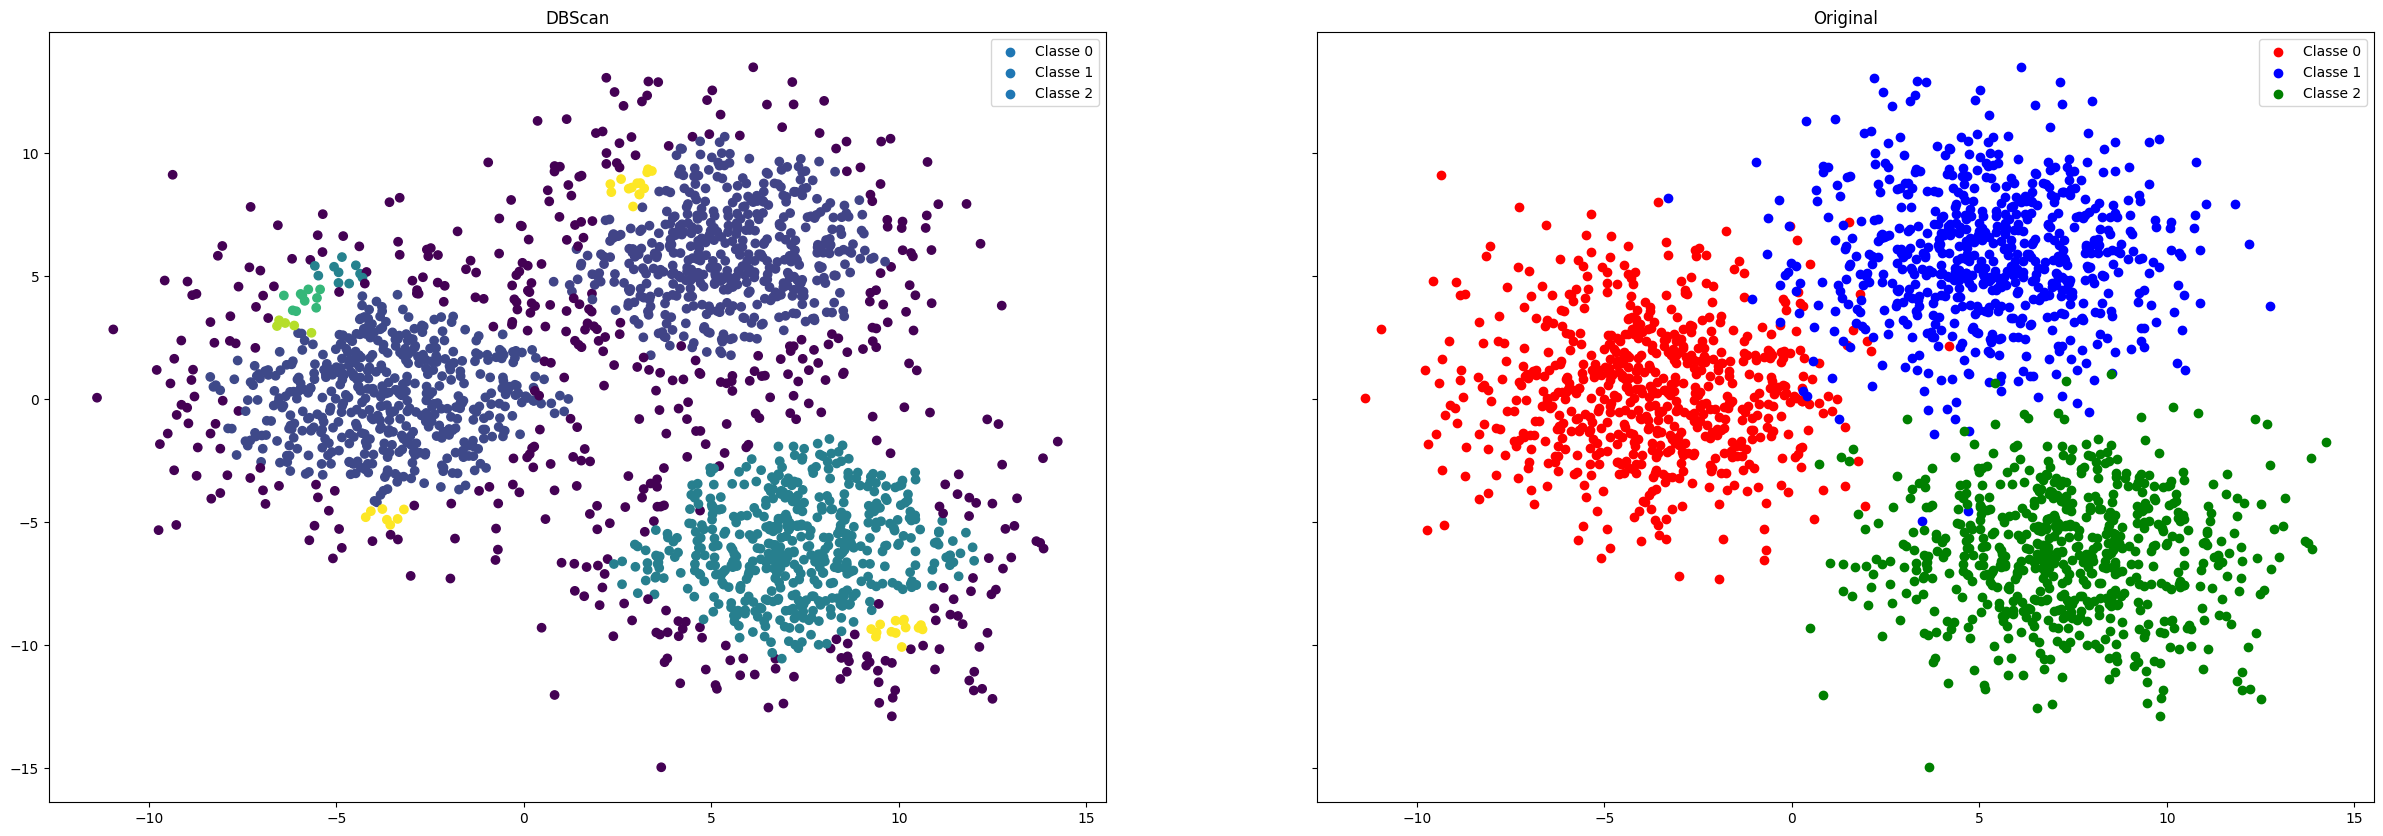

In [8]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(30,10))
ax1.set_title("DBScan")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax1.scatter(subset['x'], subset['y'], c=X[dataframe_data['label'] == label], label=f'Classe {label}')
ax1.legend()
ax2.set_title("Original")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax2.scatter(subset['x'], subset['y'], c=color, label=f'Classe {label}')

# Add labels and legend
ax2.legend()

In [9]:
Agnes = AgglomerativeClustering(n_clusters=4)
Agnes.fit(dataframe_data)
X = Agnes.labels_

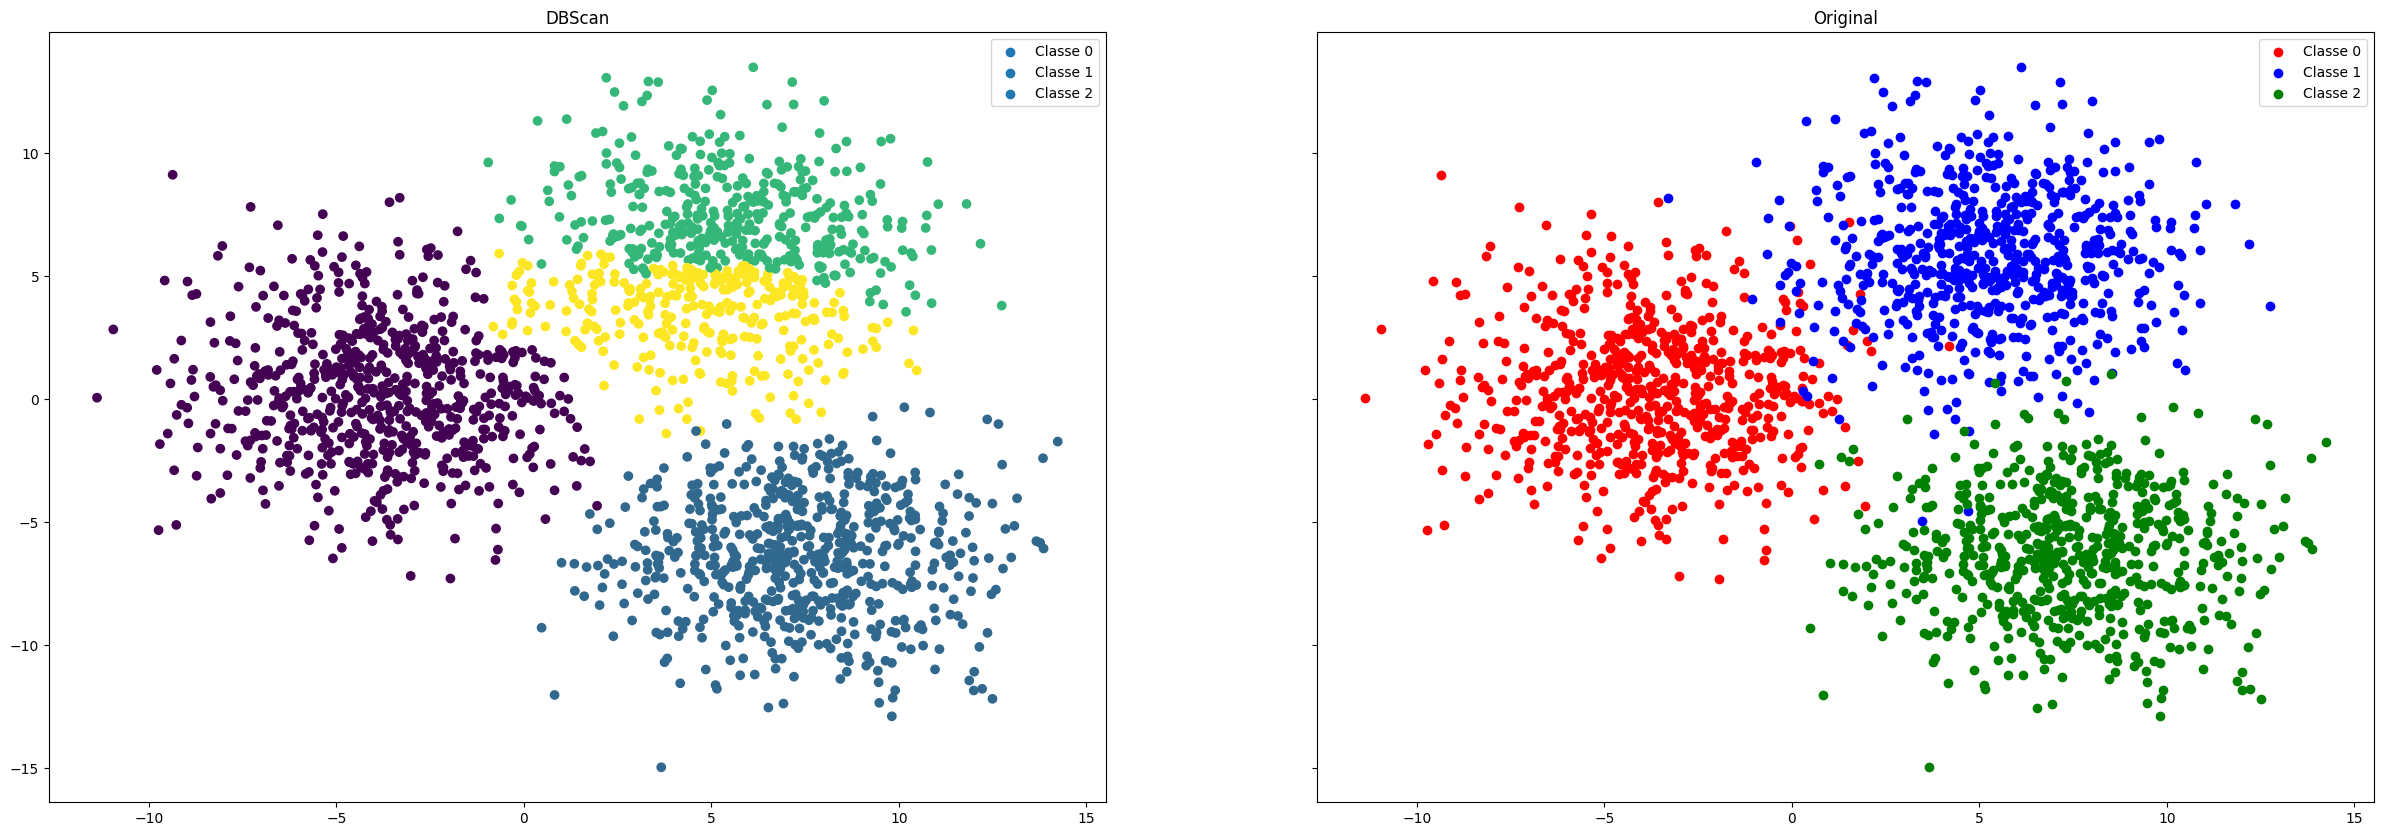

In [10]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(30,10))
ax1.set_title("DBScan")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax1.scatter(subset['x'], subset['y'], c=X[dataframe_data['label'] == label], label=f'Classe {label}')
ax1.legend()
ax2.set_title("Original")
for label, color in label_colors.items():
    subset = dataframe_data[dataframe_data['label'] == label]
    ax2.scatter(subset['x'], subset['y'], c=color, label=f'Classe {label}')

# Add labels and legend
ax2.legend()